In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
"""
Functions written for ease of usage of the model.
"""

def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = pd.DataFrame(df[feature_names[:]])
    df_target = pd.DataFrame(df[target_names[:]])
    return df_feature, df_target

def plot_data(df: pd.DataFrame, 
              feature: str, 
              target: str):
    sns.set()
    feature = pd.DataFrame(df[feature])
    target = pd.DataFrame(df[target])
    plt.scatter(feature, target)

# Finds xy correlation constant
def calc_correlation(df: pd.DataFrame,
                     feature: str,
                     target: str):
    f = df[feature].to_numpy()
    t = df[target].to_numpy()
    coef = np.corrcoef(f, t)[0][1]
    if np.isnan(coef):
        return 0
    return coef

def get_numpy_features(df: pd.DataFrame,
                       feature_names: list[str],
                       target_names: list[str]):
    f_n = df[feature_names[:]].to_numpy()
    t_n = df[target_names[:]].to_numpy()
    return f_n, t_n

In [4]:
"""
Getting Data from data.csv.
"""

# Sanity check: stops program if the number of datapoints differ across columns
try:
    df: pd.DataFrame = pd.read_csv("../data/data.csv")
    if (len(set(df.count())) != 1):
        raise Exception("Datapoints differ across columns")
except Exception as e:
    print(f"Caught: {e}")

# print(df)

# Independant Variable
VAR_Y = 'YEAR'
VAR_C = 'CROP_YIELD_BPA'
VAR_CU = 'CROP_YIELD_USA_BPA'

# Dependant Variables

VAR_TEMP = 'TEMP_F'
VAR_RAIN = 'RAINFALL_IN'
VAR_WIND = 'WINDSPEED_MPH'
VAR_SNOW = 'SNOWFALL_IN'
VAR_PEST = 'PESTICIDE_M_TON'
VAR_GDP = 'GDP_$'
VAR_FERT = 'FERTILISER_M_TON'

vars = [VAR_TEMP, VAR_RAIN, VAR_WIND, VAR_SNOW, VAR_PEST, VAR_GDP, VAR_FERT]

df_features, df_target = get_features_targets(df, 
                                              vars, 
                                              [VAR_CU])

# print("Features: ", [df_features[f] for f in df_features])
# print("Target: ", df_target)


c:\Users\aryan\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\aryan\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


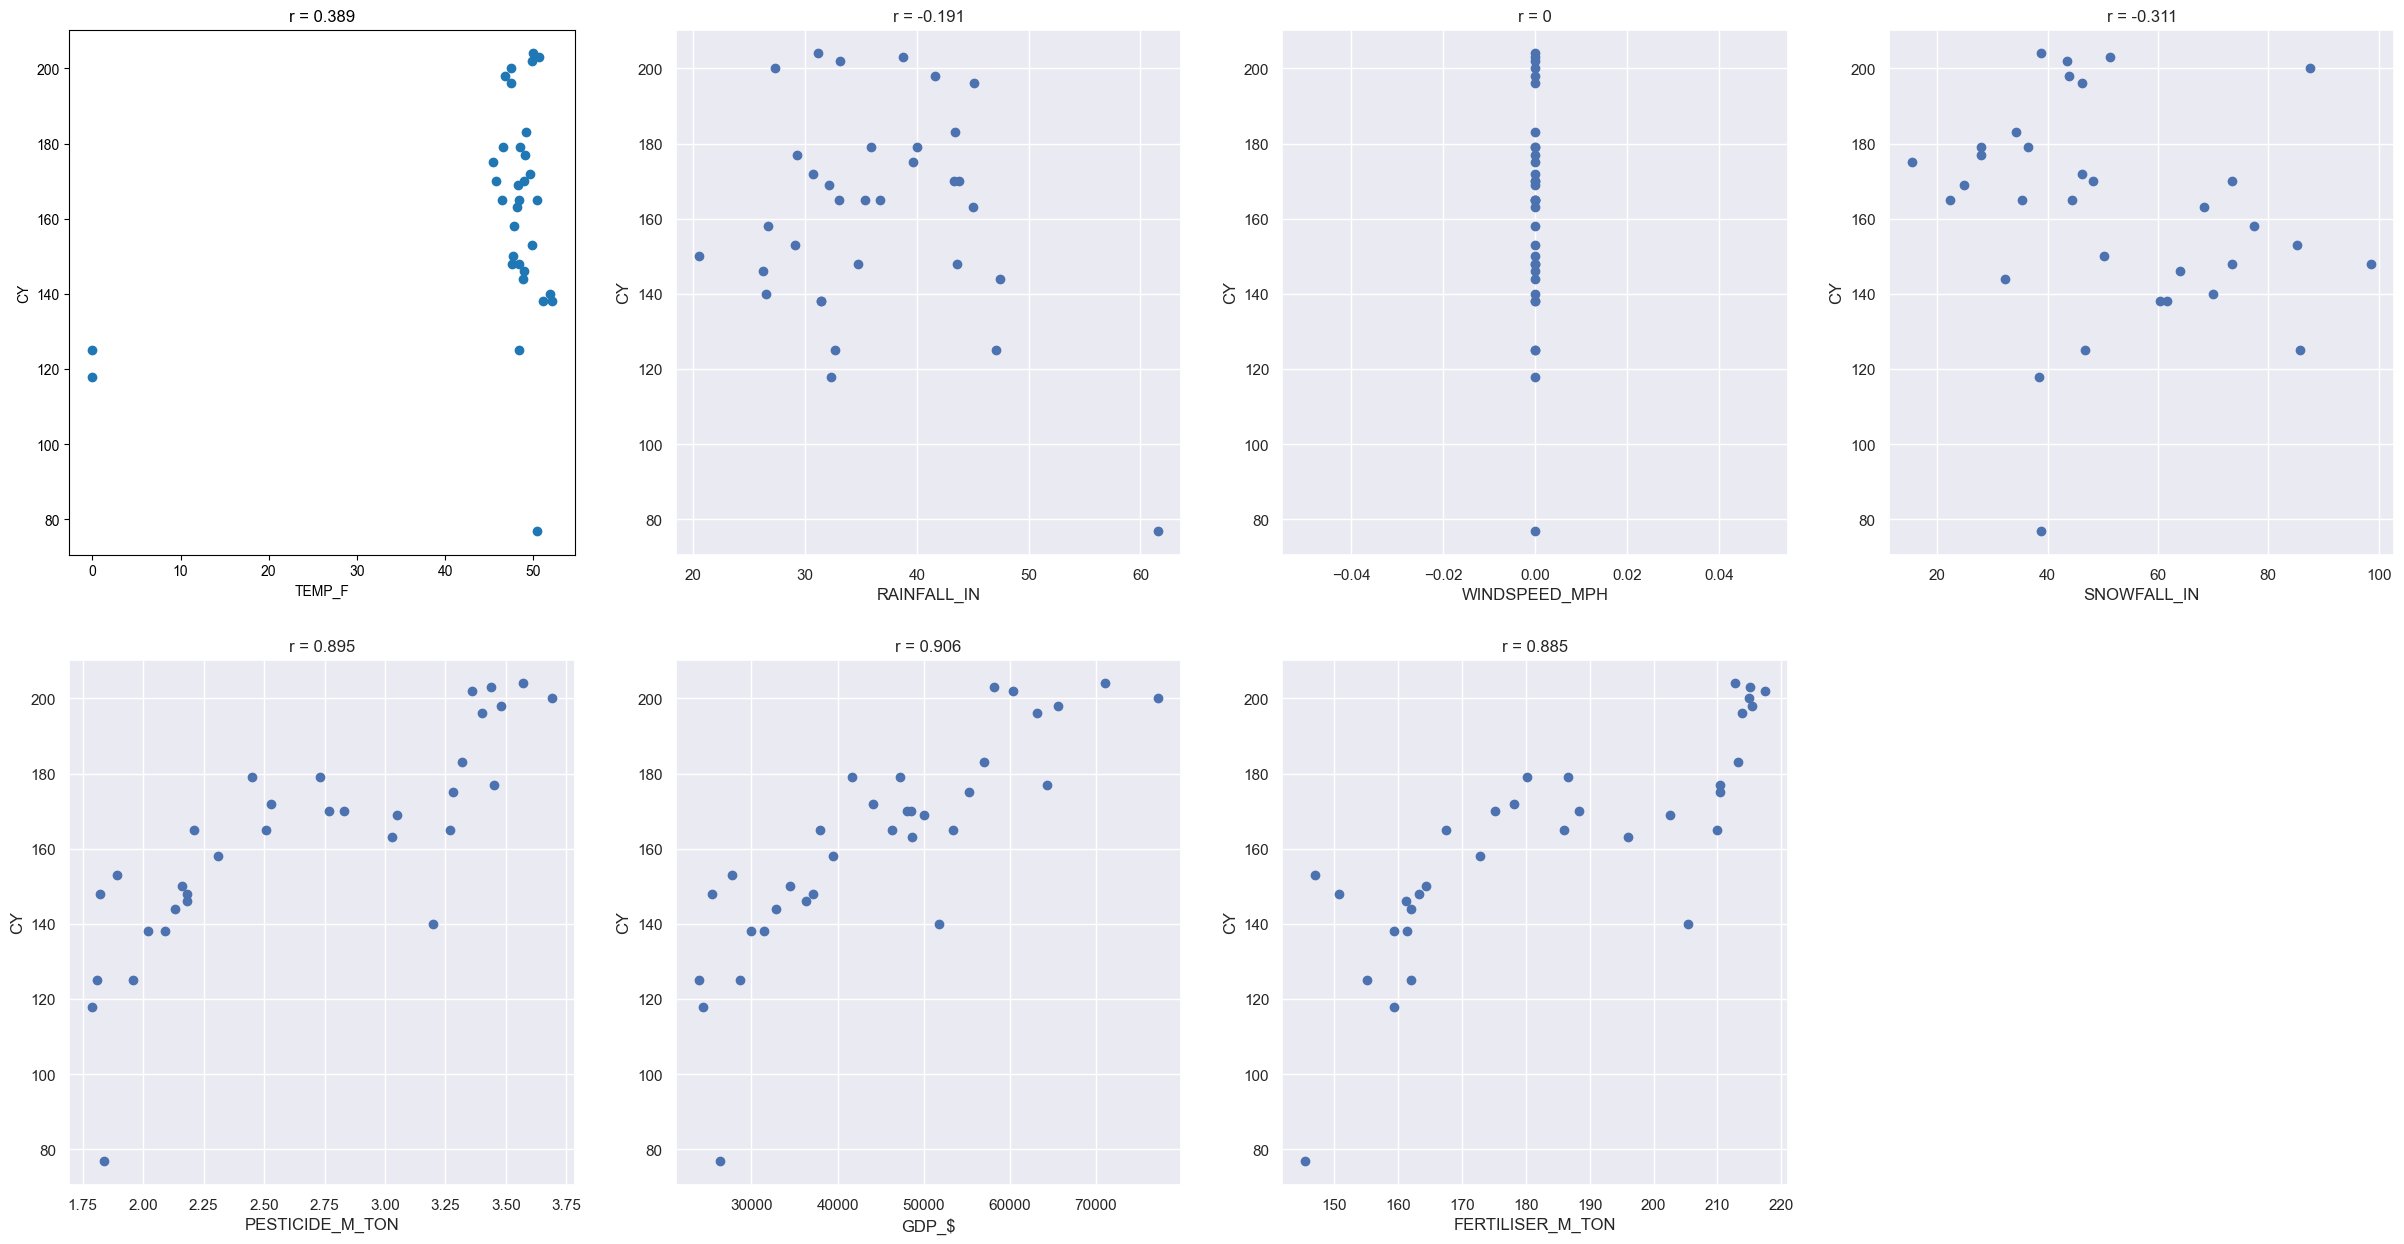

In [5]:
"""
Relationship between each dependant and independant variable

"""
plt.figure(figsize=(30, 15))

i = 1
for var in vars:
    plt.subplot(2, 4, i)
    plt.xlabel(var)
    plt.ylabel("CY")
    r = calc_correlation(df, var, VAR_CU)
    plt.title(f"r = {round(r, 3)}")
    plot_data(df, var, VAR_C)
    i += 1

plt.savefig("../data/figures/correlation.png")
# plot_data(df, dep[VAR_PEST], VAR_C)

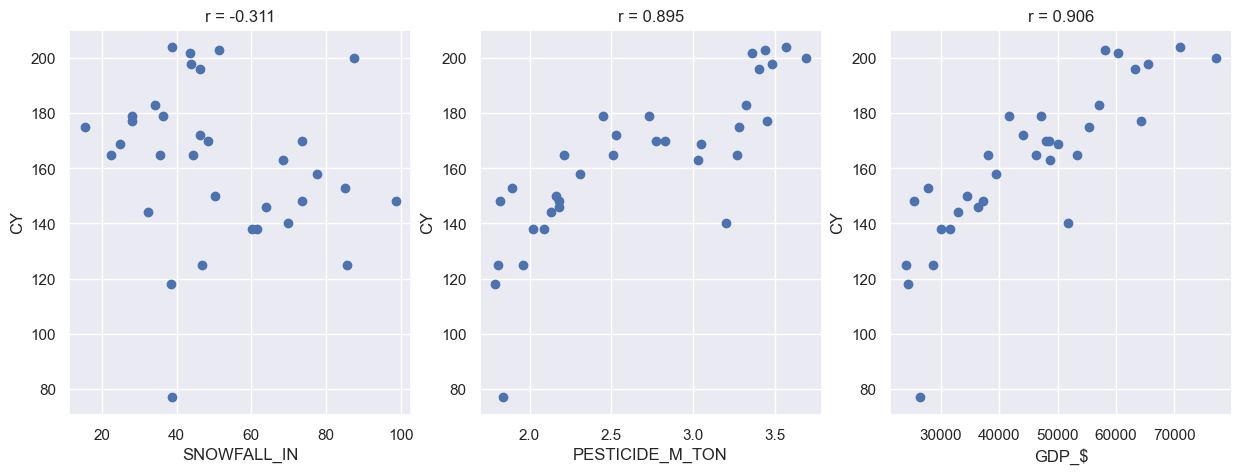

In [6]:

VAR_SNOW: 'SNOWFALL_IN'
VAR_PEST: 'PESTICIDE_M_TON'
VAR_GDP: 'GDP_$'

chosen_dep = [VAR_SNOW, VAR_PEST, VAR_GDP]

plt.figure(figsize=(15, 5))

i = 1
for var in chosen_dep:
    plt.subplot(1, 3, i)
    plt.xlabel(var)
    plt.ylabel("CY")
    r = calc_correlation(df, var, VAR_CU)
    plt.title(f"r = {round(r, 3)}")
    plot_data(df, var, VAR_C)
    i += 1

plt.savefig("../data/figures/chosendep.png")

In [7]:

# Data transformation
from regression_functions import MVF
f, t = get_numpy_features(df, ['SNOWFALL_IN', 'PESTICIDE_M_TON', 'GDP_$'], [VAR_CU])
model = MVF(f, t)
model.feature_names = ['SNOWFALL_IN', 'PESTICIDE_M_TON', 'GDP_$']
model.target_name = VAR_CU
model.normalize_data()
model.gradient_descent()
print(model.weights[1:4])
# print(model.costs)
# print(model.predictions)

[[-0.08994607]
 [ 0.37866315]
 [ 0.51020136]]


In [ ]:
def plot_with_two_varied_variables(model: MVF, feature_to_keep_constant, constant_value=None, savefig=None):
    """
    Visualizes the data by varying two features and keeping one feature constant.

    Parameters:
    X (numpy.ndarray): Feature matrix, including the bias term as the first column.
    y (numpy.ndarray): Actual target values.
    weights (numpy.ndarray): Weights of the regression model, including the bias term.
    features_to_vary (tuple): Indices of the two features to vary.
    feature_to_keep_constant (int): Index of the feature to keep constant.
    constant_value (float): Value to keep the constant feature at.
    X_mean (numpy.ndarray): Mean of the features before normalization.
    X_std (numpy.ndarray): Standard deviation of the features before normalization.
    y_mean (float): Mean of the target variable before normalization.
    y_std (float): Standard deviation of the target variable before normalization.
    """

    X = model.get_ind
    y = model.get_dep
    weights = model.weights

    assert feature_to_keep_constant < X.shape[1], 'Invalid feature index'

    vfi = [i for i in range(X.shape[1]) if i != feature_to_keep_constant]
    print(vfi)
    feature1, feature2 = vfi[0], vfi[1]
    # print(model.feature_names[feature1], model.feature_names[feature2])

    X_mean, X_std = model.get_ind_mean_std
    y_mean, y_std = model.get_dep_mean_std

    # Generate ranges for the two features to vary (in normalized scale)
    x1_varied_norm = np.linspace(X[:, feature1].min(), X[:, feature1].max(), 50)
    x2_varied_norm = np.linspace(X[:, feature2].min(), X[:, feature2].max(), 50)

    # Create a meshgrid for the two features
    X1_norm, X2_norm = np.meshgrid(x1_varied_norm, x2_varied_norm)

    # Scale back the feature ranges to the original scale
    X1_orig = X1_norm * X_std[feature1] + X_mean[feature1]  # Exclude bias
    X2_orig = X2_norm * X_std[feature2] + X_mean[feature2]  # Exclude bias

    if constant_value is None:
        constant_value = X_mean[feature_to_keep_constant]

    # Create a copy of the feature matrix and set the constant feature to the given value
    X_copy = np.zeros((X1_norm.size, X.shape[1]))
    X_copy[:, 0] = 1  # Bias term
    X_copy[:, feature1] = X1_norm.ravel()
    X_copy[:, feature2] = X2_norm.ravel()
    X_copy[:, feature_to_keep_constant] = (constant_value - X_mean[feature_to_keep_constant]) / X_std[feature_to_keep_constant]

    # Compute predictions in normalized scale
    y_pred_normalized = np.dot(X_copy, weights[1:4])

    # Scale predictions back to original scale
    y_pred = y_pred_normalized * y_std + y_mean

    # Reshape predictions for plotting
    Y_pred = y_pred.reshape(X1_orig.shape)

    # Plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.clear()

    ax.plot_surface(X1_orig, X2_orig, Y_pred, cmap='viridis', alpha=0.8)
    ax.set_xlabel(f'{model.feature_names[feature1]} (Original Scale)')
    ax.set_ylabel(f'{model.feature_names[feature2]} (Original Scale)')
    ax.set_zlabel(f'{model.target_name} (Original Scale)')
    ax.set_box_aspect(None, zoom=0.95)
    plt.title(f'Constant Value: {model.feature_names[feature_to_keep_constant]} = {round(constant_value, 3)}')
    plt.show()

    if savefig:
        plt.savefig(savefig)
    
# plot_with_two_varied_variables(model, 1, constant_value=1)


[0, 1]


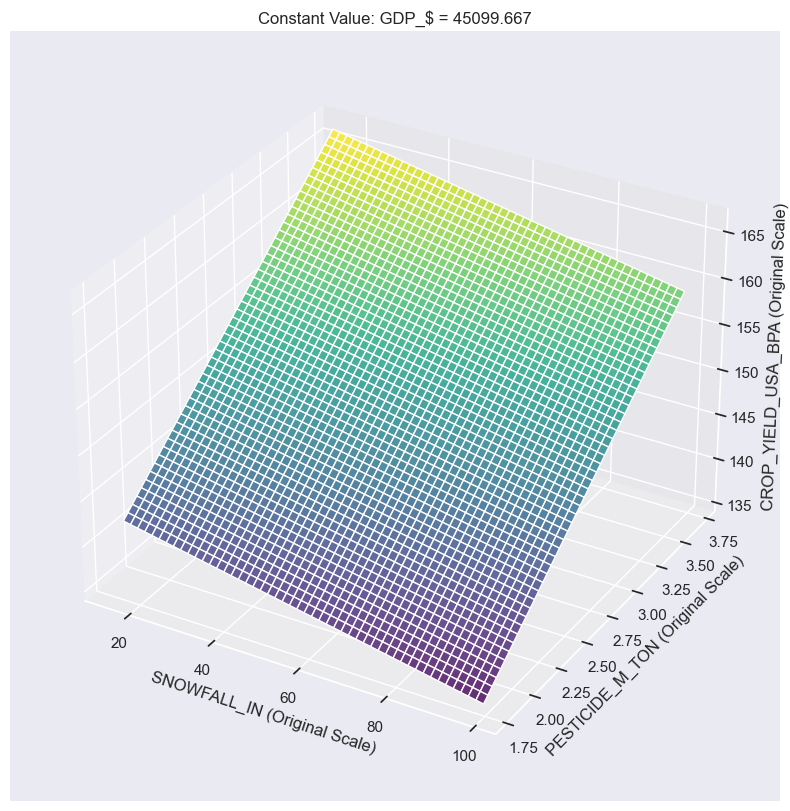

In [9]:
plot_with_two_varied_variables(model, 2)